In [1]:
# Bibliotheken abrufen
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# URL als Variable definieren
url = "https://rodare.hzdr.de/api/records/?page=1&sort=mostrecent&size=1000"

In [3]:
# Funktion um Inhalt aus URL in Variable r zu speichern
r = requests.get(url)

In [4]:
# JSON lesen lassen
json = r.json()

In [5]:
# Dictionary anlegen und Keys der gewünschten Werte definieren
Meta_dict = {}
Meta_dict['type'] = []
Meta_dict['license'] = []
Meta_dict['rel_id'] = []
Meta_dict['pub_date'] = []
Meta_dict['Access_Right'] = []
Meta_dict['Downloads'] = []
Meta_dict['u_downloads'] = []
Meta_dict['u_views'] = []
Meta_dict['views'] = []
Meta_dict['ref_by'] = []
Meta_dict['doi'] = []

In [6]:
# Definition einer Teilliste und for-Schleife, um den type der Records aus allen Einträgen auszulesen und aufzulisten
for record in json['hits']['hits']:
    Meta_dict['type'].append(record['metadata']['resource_type']['type'])
# Definition einer if-else Bedingung für den Abruf der Lizenz (gibt es nicht bei closed Access Veröffentlichungen)    
    if 'license' in record['metadata'].keys():
        Meta_dict['license'].append(record['metadata']['license']['id'])
    else:
        Meta_dict['license'].append('NaN')
# Iteration in Liste der related identifier anlegen und dort die Bedigungen für das Auslesen definieren
    count_1 = 0
    count_2 = 0
    for identifier in record['metadata']['related_identifiers']:
# nur wenn die Relation 'isReferencedBy' mit dem dazugehörigen Inhalt hzdr gefunden wird, wird der count_1 betätigt
# Hintergrund: Zählung aus RODARE-Sicht ob Record den Archivierungsworkflow von ROBIS bedient
        if identifier['relation'] == 'isReferencedBy' and 'hzdr' in identifier['identifier']:
            count_1 = count_1 + 1
# nur wenn die Relation 'isReferencedBy' gefunden wird, wird der count_2 betätigt
# Hintergrund: Zählung aus RODARE-Sicht ob Record überhaupt ein zugehörige Referenz hat (ROBIS + x)            
        if identifier['relation'] == 'isReferencedBy':
            count_2 = count_2 + 1
    Meta_dict['rel_id'].append(count_1)
    Meta_dict['ref_by'].append(count_2)
# einfaches Auslesen der Metadaten und Zuordnung in entsprechende Listen/Keys
    # Publikationsdatum nach 10 Zeichen abgeschnitten
    Meta_dict['pub_date'].append(record['created'][:10])
    Meta_dict['Access_Right'].append(record['metadata']['access_right'])
    Meta_dict['Downloads'].append(int(record['stats']['downloads']))
    Meta_dict['u_downloads'].append(int(record['stats']['unique_downloads']))
    Meta_dict['u_views'].append(int(record['stats']['unique_views']))
    Meta_dict['views'].append(int(record['stats']['views']))
    Meta_dict['doi'].append(record['links']['doi'])

In [7]:
# Umwandlung des Dictionaries in ein DataFrame mit pd
df = pd.DataFrame(Meta_dict)

In [8]:
# Abbildung des Dataframes
df

,type,license,rel_id,pub_date,Access_Right,Downloads,u_downloads,u_views,views,ref_by,doi
0,dataset,CC-BY-4.0,1,2021-08-12,open,0,0,3,3,1,https://doi.org/10.14278/rodare.1111
1,dataset,CC-BY-4.0,1,2021-08-09,open,2,2,14,19,1,https://doi.org/10.14278/rodare.1098
2,dataset,CC-BY-4.0,0,2021-08-09,open,0,0,5,5,0,https://doi.org/10.14278/rodare.1105
3,software,LGPL-3.0,0,2021-08-06,open,0,0,22,31,0,https://doi.org/10.14278/rodare.1103
4,dataset,NaN,1,2021-08-06,restricted,0,0,4,4,1,https://doi.org/10.14278/rodare.1093
...,...,...,...,...,...,...,...,...,...,...,...
265,dataset,CC-BY-SA-4.0,0,2018-05-09,open,23,22,340,402,0,https://doi.org/10.14278/rodare.24
266,dataset,CC-BY-4.0,0,2018-04-25,open,90,33,349,423,0,https://doi.org/10.14278/rodare.16
267,dataset,CC-BY-4.0,0,2018-04-12,open,23,18,287,344,0,https://doi.org/10.14278/rodare.8
268,dataset,NaN,0,2018-03-20,restricted,0,0,257,290,0,https://doi.org/10.14278/rodare.4


In [9]:
# Anzeige der Allgemeinen Eigenschaften der Spalten
df.describe(include='all')

,type,license,rel_id,pub_date,Access_Right,Downloads,u_downloads,u_views,views,ref_by,doi
count,270,270,270.000000,270,270,270.000000,270.000000,270.000000,270.000000,270.000000,270
unique,6,10,NaN,177,4,NaN,NaN,NaN,NaN,NaN,270
top,dataset,CC-BY-4.0,NaN,2021-03-10,open,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.14278/rodare.809
freq,207,125,NaN,18,153,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,0.614815,NaN,NaN,70.074074,26.570370,97.144444,140.344444,0.622222,NaN
std,NaN,NaN,0.495109,NaN,NaN,240.290473,73.376915,101.609270,128.874668,0.508174,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,3.000000,3.000000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,40.250000,63.000000,0.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,5.000000,4.000000,68.000000,107.000000,1.000000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,37.000000,20.000000,102.500000,160.000000,1.000000,NaN


In [10]:
# Defintion und Berechungen zu Datumsangaben
from datetime import date
aktuellesDatum = date.today()
rodare_pub = date(2018,2,28)
zeitraum = aktuellesDatum - rodare_pub
zr = zeitraum.days
ds = zr/len(df)
lpd = df['Downloads'].sum()/zr

In [104]:
# Ausgabe einige Sonderfälle und statistischer Werte
print('Stand',aktuellesDatum.strftime("%d.%m.%Y"),
      '\nSeit der Inbetriebnahme (28.02.2018) von RODARE sind',zeitraum.days,'Tage vergangen.\nInsgesamt wurden',
      str(len(df)),'Records veröffentlicht und',str(df['Downloads'].sum()),
      'mal gedownloaded.\nDas entspricht: 1 Veröffentlichung alle',round(ds,1),
      'Tage und' ,round(lpd,1), 'Downloads pro Tag. \nDer meistgeladene Record',
       df.iloc[df.Downloads.idxmax(), 10], 'wurde',df['Downloads'].max(),
      'mal gedownloaded. \nDer neueste Download',df.iloc[0, 10],
      'wurde am',df['pub_date'].max(),'veröffentlicht. \nDer meistangesehene Record',
      df.iloc[df.views.idxmax(), 10],'wurde',df['views'].max(),'mal angesehen. \nIm Durchschnitt wird 1 Record',
      round(df['views'].mean(),1),'mal angesehen und',round(df['Downloads'].mean(),1),
      'heruntergeladen. \nDie Standardabweichung für Downloads beträgt',round(df['Downloads'].std(),1)
      ,'und die für Views beträgt',round(df['views'].std(),1),'. ')

Stand 14.08.2021 
Seit der Inbetriebnahme (28.02.2018) von RODARE sind 1263 Tage vergangen.
Insgesamt wurden 270 Records veröffentlicht und 18920 mal gedownloaded.
Das entspricht: 1 Veröffentlichung alle 4.7 Tage und 15.0 Downloads pro Tag. 
Der meistgeladene Record https://doi.org/10.14278/rodare.915 wurde 2216 mal gedownloaded. 
Der neueste Download https://doi.org/10.14278/rodare.1111 wurde am 2021-08-12 veröffentlicht. 
Der meistangesehene Record https://doi.org/10.14278/rodare.915 wurde 847 mal angesehen. 
Im Durchschnitt wird 1 Record 140.3 mal angesehen und 70.1 heruntergeladen. 
Die Standardabweichung für Downloads beträgt 240.3 und die für Views beträgt 128.9 . 


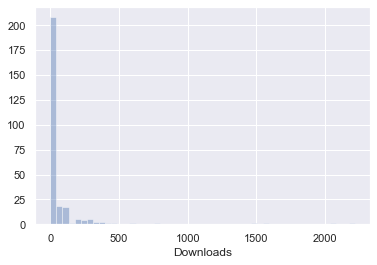

In [132]:
# graphische Darstellung der Downloadverteilung
fig_1 = sns.distplot(df['Downloads'], kde=False)
fig_1.figure.savefig("./Verteilung_Downloads.png", dpi=300)

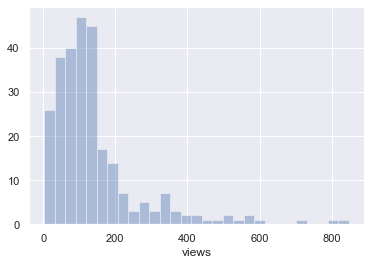

In [134]:
# graphische Darstellung der Viewverteilung
fig_2 = sns.distplot(df['views'], kde=False)
fig_2.figure.savefig("./Verteilung_Views.png", dpi=300)

In [130]:
# absolute Aufschlüsselung der Datentypen nach Anzahl
dt=df['type'].value_counts()
print(dt)

dataset         207
software         24
image            15
other            13
video             6
presentation      5
Name: type, dtype: int64


In [74]:
# relative Aufschlüsselung der Datentypen nach Anzahl
df['type'].value_counts(normalize=True)

dataset         0.766667
software        0.088889
image           0.055556
other           0.048148
video           0.022222
presentation    0.018519
Name: type, dtype: float64

In [108]:
# absolute Aufschlüsselung der Lizenzen in Abhängigkeit des Datentypen nach Anzahl
df.groupby(['type','license']).size()

type          license     
dataset       CC-BY-1.0         4
              CC-BY-4.0        88
              CC-BY-NC-4.0      8
              CC-BY-SA-4.0      3
              NaN             104
image         CC-BY-1.0         1
              CC-BY-4.0         9
              NaN               5
other         CC-BY-4.0         7
              NaN               6
presentation  CC-BY-4.0         5
software      BSD-3-Clause      1
              CC-BY-4.0        10
              GPL-3.0           4
              GPL-3.0-only      4
              LGPL-3.0          3
              MIT               1
              NaN               1
video         CC-BY-4.0         6
dtype: int64

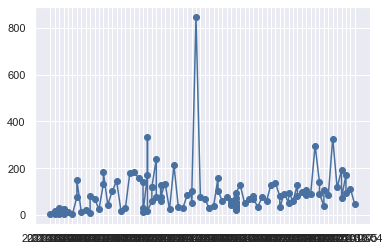

In [145]:
# graphische Darstellung der Views je Record in chronologischer Reihenfolge für bestimmten Zeitraum
start_date = '2021-01-01'
view_rec = plt.plot(df['pub_date'][df['pub_date'] >= start_date], 
         df['views'][df['pub_date'] >= start_date], 
         color='#4870a0', 
         marker='o')
plt.savefig("./Verteilung_Views_2021.png", dpi=300)